# Cash-or-Nothing Binary Put Option

## 'Walmart' - S&P500 stock

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

###  Data from 01-03-2020 to 01-03-2021

In [68]:
data = yf.download('WMT',start = '2020-03-01', end='2021-03-01')


[*********************100%***********************]  1 of 1 completed


In [69]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,107.599998,116.400002,107.290001,115.879997,113.503433,17074200
2020-03-03,116.080002,117.529999,112.339996,112.910004,110.594353,11113600
2020-03-04,114.239998,116.839996,113.470001,116.769997,114.375168,8208400
2020-03-05,114.400002,117.250000,113.910004,115.919998,113.542610,8546100
2020-03-06,113.870003,117.910004,113.010002,117.230003,114.825760,9803700


In [70]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-22,137.740005,138.339996,136.250000,137.690002,137.117508,10702200
2021-02-23,137.110001,137.389999,135.059998,135.470001,134.906738,10433400
2021-02-24,135.869995,136.160004,133.050003,133.210007,132.656143,15521900
2021-02-25,133.100006,134.009995,131.479996,131.949997,131.401367,11108200
2021-02-26,131.479996,131.809998,129.860001,129.919998,129.379807,14146800


In [55]:
data =  pd.DataFrame(data = data['Adj Close'])

In [56]:
data

,Adj Close
Date,
2020-03-02,113.503433
2020-03-03,110.594353
2020-03-04,114.375168
2020-03-05,113.542610
2020-03-06,114.825760
...,...
2021-02-22,137.117508
2021-02-23,134.906738
2021-02-24,132.656143


In [57]:
data.describe().round(2)

,Adj Close
count,251.00
mean,132.54
std,11.75
min,101.92
25%,122.28
50%,132.66
75%,143.41
max,151.60


In [58]:
data['returns'] = np.log (data['Adj Close'] / data['Adj Close'].shift(1))
data

,Adj Close,returns
Date,,
2020-03-02,113.503433,NaN
2020-03-03,110.594353,-0.025964
2020-03-04,114.375168,0.033615
2020-03-05,113.542610,-0.007306
2020-03-06,114.825760,0.011238
...,...,...
2021-02-22,137.117508,-0.004710
2021-02-23,134.906738,-0.016255
2021-02-24,132.656143,-0.016823


In [21]:
# Daily volatility for 12M
daily_std =np.std(data.returns)
daily_std

0.01957926566751677

### Annualized Volatility for 12M

In [22]:
# Annualized Volatilty
std = daily_std * np.sqrt(252)
print('The Annualized Volatility for 12M is',round(std*100,2),'%')

The Annualized Volatility for 12M is 31.08 %


### Adj Close - Graph plot for 12M

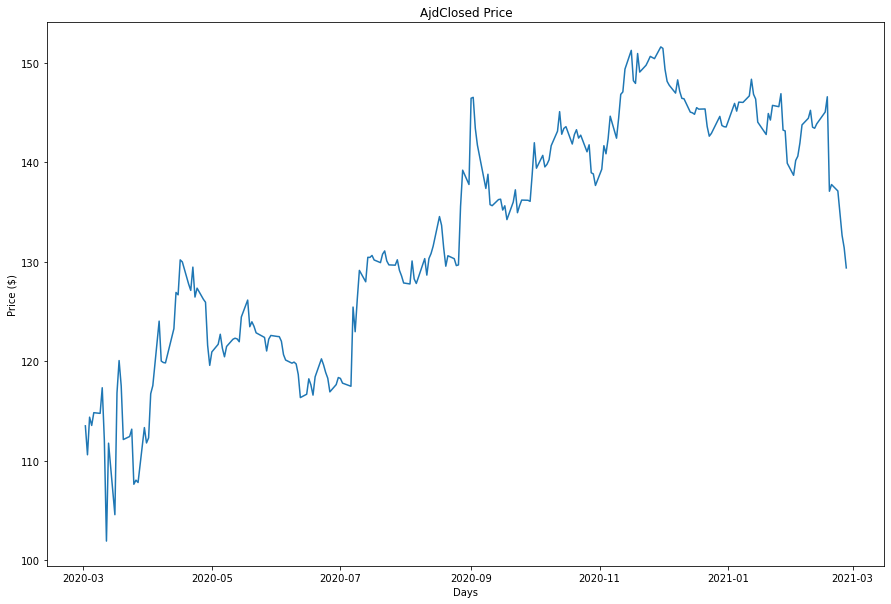

In [41]:
fig = plt.figure(figsize = (15,10))
plt.plot(data['Adj Close'])
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.title('AjdClosed Price');

### Six months data from 01-09-2020 to 01-03-2021

In [42]:
sixlr = data[127:-1]
sixlr

,Adj Close,returns
Date,,
2020-08-31,137.769104,-0.010389
2020-09-01,146.441040,0.061044
2020-09-02,146.530350,0.000610
2020-09-03,143.414795,-0.021491
2020-09-04,141.718109,-0.011901
...,...,...
2021-02-19,137.764801,0.004928
2021-02-22,137.117508,-0.004710
2021-02-23,134.906738,-0.016255


In [52]:
# daily volatility for 6M sample 
daily_std1 = np.std(sixlr.returns)
daily_std1

0.013428983177593326

### Annualized Volatility for 6M

In [44]:
std = daily_std1 * np.sqrt(252)
print('The Annualized Volatility for 6M is',round(std*100,2),'%')

The Annualized Volatility for 6M is 21.32 %


### Adj Close - Graph plot for 6M

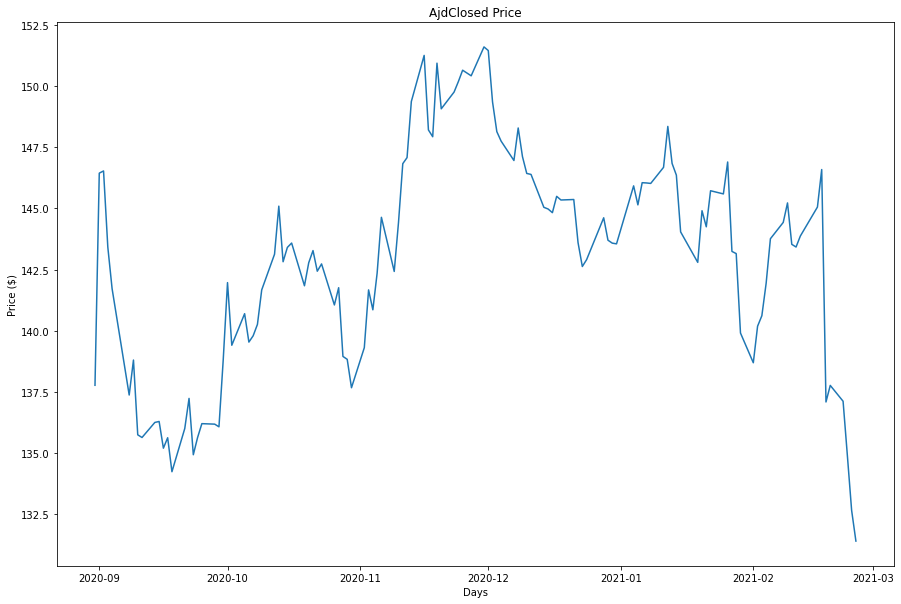

In [45]:
fig = plt.figure(figsize = (15,10))
plt.plot(sixlr['Adj Close'])
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.title('AjdClosed Price');

# Black - Scholes Method and Monte-Carlo method

#### To calcutae the volatility , We have to do the mean/Average of 12M and 6M annualized volatility from the above results

In [22]:
S0 = 133.53   #Spot Stock Price
k = 130       #strike price
T = 4/52      #maturity
r = 0.0169    #risk free rate
sig =0.2619    #diffusion coefficient or volatlity
N = 3         #number of periods or number of time steps
payoff ='put' #payoff

### Black- Scholes Method

In [74]:
def binary_option_bs(S0,k,T,r,sig,payoff):
    d1 = (np.log(S0 / k) + (r + 0.5 * sig ** 2) * T) / (sig * np.sqrt(T))
    d2 = (np.log(S0 / k) + (r - 0.5 * sig ** 2) * T) / (sig * np.sqrt(T))
   
    if payoff == "call":
        option_value = np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [75]:
binary_option_bs(133.53,130,4/52,0.0169,0.2619,'put')

0.3625412975380868

### Graph plot for Black-scholes Method

In [76]:
import numpy as np
S0 = np.linspace(10,200,13)
T = np.linspace(0.5,2,51)
BS = np.zeros((len(T),len(S0)))
for j in range(len(S0)):
    for i in range(len(T)):
        BS[i,j] = binary_option_bs(S0[j],130,T[i],0.0169,0.2619,'put')

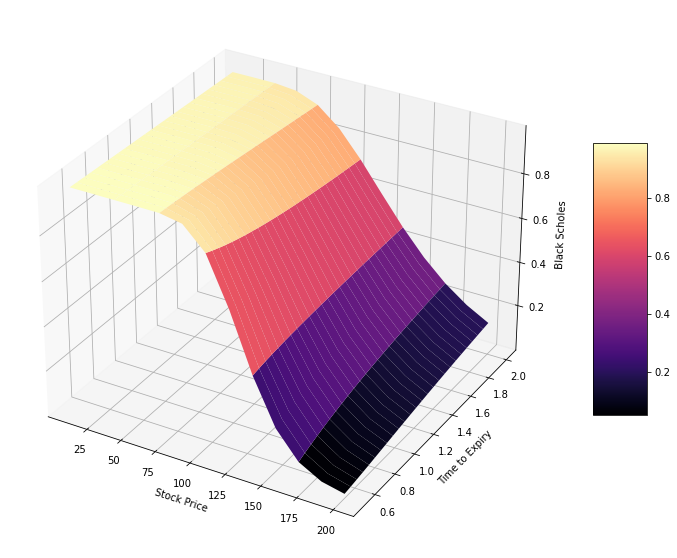

In [77]:
fig = plt.figure(figsize=(15, 10))
ax = fig.gca(projection='3d')
S0, T = np.meshgrid(S0, T)
surf = ax.plot_surface(S0, T,BS, rstride=2, cstride=2, cmap=plt.cm.magma, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Black Scholes')
fig.colorbar(surf, shrink=0.5, aspect=5);

## Monte Carlo simulation

In [82]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [83]:
T = 4/52
r = 0.0169
sigma = 0.2619
S0 = 133.53
K = 130

In [84]:
S = mcs_simulation_np(100)

In [85]:
S

array([[133.53      , 133.53      , 133.53      , ..., 133.53      ,
        133.53      , 133.53      ],
       [134.2193689 , 132.89313919, 133.08571593, ..., 132.05063628,
        133.49630085, 133.42655263],
       [134.51825785, 131.37858452, 133.66054884, ..., 132.78476341,
        131.69261684, 134.95642531],
       ...,
       [144.36064877, 131.81245911, 150.64740064, ..., 126.46581322,
        132.6885961 , 130.94302335],
       [145.35188925, 131.89792916, 149.66477526, ..., 126.47686832,
        133.50766165, 132.31224227],
       [144.69549437, 130.73695054, 146.9534208 , ..., 125.36123335,
        132.73942606, 132.3186739 ]])

In [86]:
S = np.transpose(S)
S

array([[133.53      , 134.2193689 , 134.51825785, ..., 144.36064877,
        145.35188925, 144.69549437],
       [133.53      , 132.89313919, 131.37858452, ..., 131.81245911,
        131.89792916, 130.73695054],
       [133.53      , 133.08571593, 133.66054884, ..., 150.64740064,
        149.66477526, 146.9534208 ],
       ...,
       [133.53      , 132.05063628, 132.78476341, ..., 126.46581322,
        126.47686832, 125.36123335],
       [133.53      , 133.49630085, 131.69261684, ..., 132.6885961 ,
        133.50766165, 132.73942606],
       [133.53      , 133.42655263, 134.95642531, ..., 130.94302335,
        132.31224227, 132.3186739 ]])

In [89]:
pp = (K - S[-1,:])>0
bpp = np.mean(np.maximum(pp.astype(int),0))
print('Binary put', str(bpp))

Binary put 0.38613861386138615


### Histogram plot graph - Monte-Carlo Simulation

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

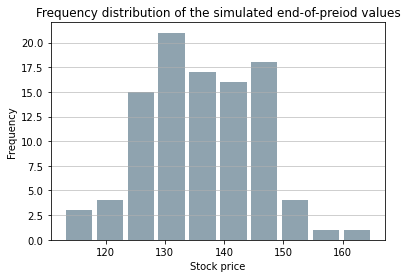

In [94]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#607c8e',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Stock price')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

# Greeks

In [217]:
S0 = 133.53   #Spot Stock Price
k = 130       #strike price
T = 4/52      #maturity
r = 0.0169    #risk free rate
q = 0    #continous dividend yield
sig =0.2619    #diffusion coefficient or volatlity
N = 3         #number of periods or number of time steps
payoff ='put' #payoff

### Delta

In [127]:
def delta(S0,k,T,r,q,sig,payoff):
    d1 = (np.log(S0/k) + (r + 0.5 * sig **2)*T)/(sig * np.sqrt(T))
    d2 = (np.log(S0/k) + (r - 0.5 * sig **2)*T)/(sig * np.sqrt(T))
    
    if payoff == 'call':
        delta =  (np.exp(-r*T))*si.norm.pdf(d2,0.0,1.0)/(sig*S0*np.sqrt(T))
    elif payoff == 'put':
        delta = -(np.exp(-r*T)*si.norm.pdf(d2,0.0,1.0))/(sig*S0*np.sqrt(T))

    return delta


In [128]:
delta(133.53,130, 4/52, 0.0169, 0, 0.2619,'put')

-0.03863125888889909

### Graph plot - Delta

In [129]:
import numpy as np
S0 = np.linspace(30,200,14)
T = np.linspace(0.5,2,51)
Delta = np.zeros((len(T),len(S0)))
for j in range(len(S0)):
    for i in range(len(T)):
        Delta[i,j] = delta(S0[j],130,T[i],0.0169,0,0.2619,'put')

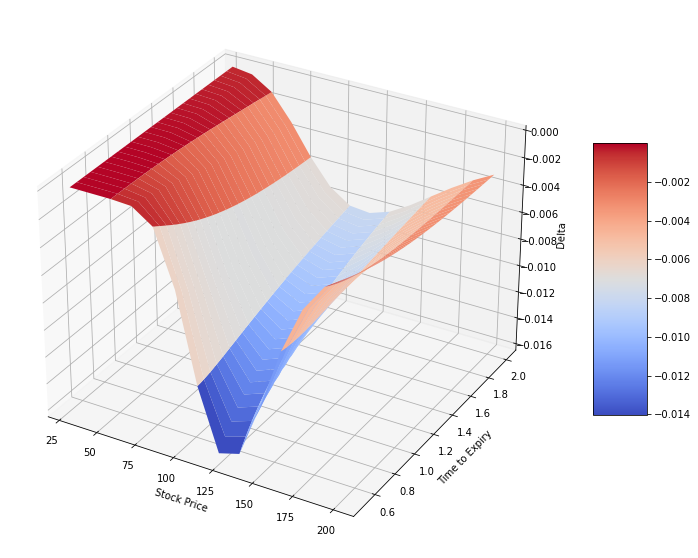

In [130]:
fig = plt.figure(figsize=(15, 10))
ax = fig.gca(projection='3d')
S0, T = np.meshgrid(S0, T)
surf = ax.plot_surface(S0, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

### Gamma

In [143]:
def gamma(S0,k,T,r,q,sig,payoff):
    d1 = (np.log(S0/k) + (r + 0.5 * sig **2)*T)/(sig * np.sqrt(T))
    d2 = (np.log(S0/k) + (r - 0.5 * sig **2)*T)/(sig * np.sqrt(T))
    
    if payoff =='call':
        gamma = -(np.exp(-r*T))*d1*si.norm.pdf(d2,0.0,1.0)/(sig**2 *S0**2 *np.sqrt(T))
    elif payoff =='put':
        gamma = np.exp(-r*T)*(d1)*si.norm.pdf(d2,0.0,1.0)/((sig**2) *(S0**2) *np.sqrt(T))
        
    return gamma


In [144]:
gamma(133.53,130, 4/52, 0.0169, 0, 0.2619,'put')

0.00046732743127927723

### Graph plot - Gamma

In [141]:
import numpy as np
S0 = np.linspace(30,150,30)
T = np.linspace(0.5,2,51)
Gamma = np.zeros((len(T),len(S0)))
for j in range(len(S0)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S0[j],130,T[i],0.0169,0,0.2619,'put')

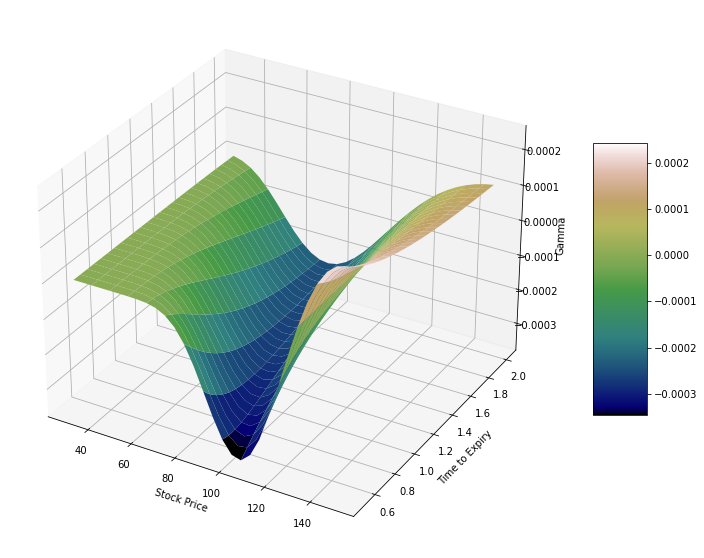

In [142]:
fig = plt.figure(figsize=(15, 10))
ax = fig.gca(projection='3d')
S0, T = np.meshgrid(S0, T)
surf = ax.plot_surface(S0, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.gist_earth, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

### Theta

In [60]:
def theta(S0,k,T,r,q,sig,payoff):
    d1 = (np.log(S0/k) + (r + 0.5 * sig **2)*T)/(sig * np.sqrt(T))
    d2 = (np.log(S0/k) + (r - 0.5 * sig **2)*T)/(sig * np.sqrt(T))
    a = d1/(2*T)
    b = (r-q)/(sig*np.sqrt(T))
    if payoff == 'call':
        theta = (r* np.exp(-r*T)*(si.norm.cdf(d2,0.0,1.0)))+((np.exp(-r*T)*si.norm.pdf(d2,0.0,1.0))* (a-b))
    elif payoff == 'put':
        theta = ((r* np.exp(-r*T)*(1- si.norm.cdf(d2,0.0,1.0)))-(np.exp(-r*T)*si.norm.pdf(d2,0.0,1.0))* (a-b))*-1

    return theta

In [61]:
theta(133.53,130,4/52,0.0169,0.0164,0.2619,'put')

1.0216601445243034

### Graph plot - Theta

In [64]:
import numpy as np
S0 = np.linspace(30,180,15)
T = np.linspace(0.5,2,51)
Theta = np.zeros((len(T),len(S0)))
for j in range(len(S0)):
    for i in range(len(T)):
        Theta[i,j] = theta(S0[j],130,T[i],0.0169,0,0.2619,'put')

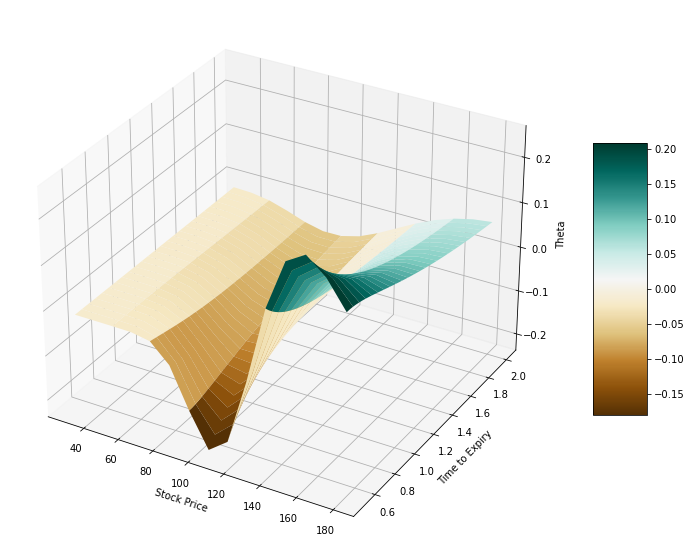

In [65]:
fig = plt.figure(figsize=(15, 10))
ax = fig.gca(projection='3d')
S0, T = np.meshgrid(S0, T)
surf = ax.plot_surface(S0, T, Theta, rstride=2, cstride=2, cmap=plt.cm.BrBG, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

### Vega

In [109]:
def vega(S0,k,T,r,q,sig,payoff):
    d1 = (np.log(S0/k) + (r + 0.5 * sig **2)*T)/(sig * np.sqrt(T))
    d2 = (np.log(S0/k) + (r - 0.5 * sig **2)*T)/(sig * np.sqrt(T))
    a = np.sqrt(T)
    b = ((d2)/sig)   
    if payoff == 'call':
        vega = (-np.exp(-r*T)*si.norm.pdf(d2,0.0,1.0)) * (a+b)
    elif payoff == 'put':
        vega = (np.exp(-r*T)*si.norm.pdf(d2,0.0,1.0)) * (a+b)
            
    return vega

In [113]:
vega(133.53,130,4/52,0.0169,0,0.2619,'put')


0.6052611439788612

In [114]:
v=vega(133.53,130,4/52,0.0169,0,0.2619,'put')
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the option will increase $', v.round(4)*0.01, '.')

The value of Vega is 0.6053 . If the volatility increases 1%, then the value of the option will increase $ 0.006052999999999999 .


### Graph plot - Vega

In [146]:
import numpy as np
S0 = np.linspace(30,150,11)
T = np.linspace(0.5,2,51)
Vega = np.zeros((len(T),len(S0)))
for j in range(len(S0)):
    for i in range(len(T)):
        Vega[i,j] = vega(S0[j],130,T[i],0.0169,0,0.2619,'put')

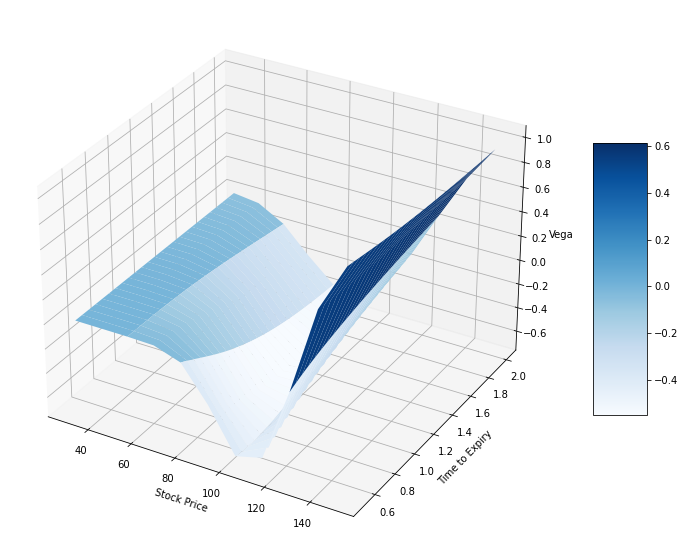

In [147]:
fig = plt.figure(figsize=(15, 10))
ax = fig.gca(projection='3d')
S0, T = np.meshgrid(S0, T)
surf = ax.plot_surface(S0, T, Vega, rstride=2, cstride=2, cmap=plt.cm.Blues, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

### Rho(Sensitivity to interest rate)

In [71]:
def RHO(S0,k,T,r,q,sig,payoff):
    d1 = (np.log(S0/k) + (r + 0.5 * sig **2)*T)/(sig * np.sqrt(T))
    d2 = (np.log(S0/k) + (r - 0.5 * sig **2)*T)/(sig * np.sqrt(T))
    
    if payoff == 'call':
        RHO = (-(T)*np.exp(-r*T)* si.norm.cdf(d2)) + ((np.sqrt(T)/sig)*np.exp(-r*T)*si.norm.pdf(d2))
    elif payoff == 'put':
        RHO = (-(T)*np.exp(-r*T)* (1-si.norm.cdf(d2))) + ((np.sqrt(T)/sig)*np.exp(-r*T)*si.norm.pdf(d2))
        
    return RHO

In [72]:
RHO(133.53,130,4/52,0.0169,0,0.2619,'put')

0.36891466937666223

### Graph plot - Rho

In [74]:
import numpy as np
S0 = np.linspace(20,150,11)
T = np.linspace(0.5,2,51)
Rho = np.zeros((len(T),len(S0)))
for j in range(len(S0)):
    for i in range(len(T)):
        Rho[i,j] = RHO(S0[j],130,T[i],0.0169,0,0.2619,'put')

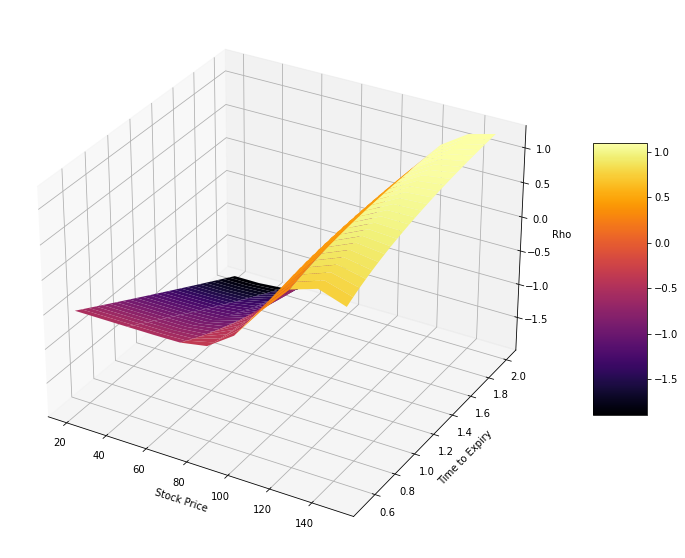

In [75]:
fig = plt.figure(figsize=(15, 10))
ax = fig.gca(projection='3d')
S0, T = np.meshgrid(S0, T)
surf = ax.plot_surface(S0, T, Rho, rstride=2, cstride=2, cmap=plt.cm.inferno, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);